<a href="https://colab.research.google.com/github/ndow33/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/LS_DS_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [49]:
#find the mean
sales = [3505,2400,3027,2798,3700,3250,2689]
total = sum(sales)
mean_sales = total/len(sales)
mean_sales

3052.714285714286

In [0]:
#find the variance
#write a function to help find the distance from the mean
def subtract_mean(number):
  return number-mean_sales

In [51]:
#use map to apply this function to our sales figures
distance = list(map(subtract_mean, sales))
distance

[452.2857142857142,
 -652.7142857142858,
 -25.71428571428578,
 -254.71428571428578,
 647.2857142857142,
 197.28571428571422,
 -363.7142857142858]

In [52]:
#square and sum all of those distances
#write a quick function
def square_distance(number):
  return number**2

squared_distances = list(map(square_distance, distance))
squared_distances

[204562.36734693873,
 426035.9387755103,
 661.2244897959217,
 64879.36734693881,
 418978.7959183673,
 38921.65306122446,
 132288.0816326531]

In [0]:
#find the length of the list
list_length = len(squared_distances)-1

In [54]:
#calculate the variance
variance_sales = sum(squared_distances)/list_length
print('{:.2f}'.format(variance_sales))

214387.90


In [55]:
#find the standard deviation
import math
std_sales = math.sqrt(variance_sales)
print('{:.2f}'.format(sd_sales))

428.67


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [0]:
import numpy as np
import pandas as pd

In [0]:
#make a list for the customers
customers = [127,80,105,92,120,115,93]

In [58]:
print('{:.2f}'.format(np.cov(sales,customers)[0][1]))

7604.36


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [59]:
#convert both lists to pandas
df_sales = pd.DataFrame({'sales':sales})
df_sales


,sales
0,3505
1,2400
2,3027
3,2798
4,3700
5,3250
6,2689


In [60]:
df_sales['customers'] = pd.Series(customers)
df_sales

,sales,customers
0,3505,127
1,2400,80
2,3027,105
3,2798,92
4,3700,120
5,3250,115
6,2689,93


In [61]:
#get standard devitations
std_cust = df_sales['customers'].std(ddof=1)
print('{:.4f}'.format(std_cust))
print('{:.4f}'.format(sd_sales))

17.0573
428.6736


In [62]:
#covariance
sales_cov = np.cov(sales,customers)[0][1]
print('{:.4f}'.format(sales_cov))

7604.3571


In [0]:
#calculate the denominator
denom = std_cust*std_sales

In [64]:
#calculate the correlation
corr_sales_cust = sales_cov/denom
print('{:.4f}'.format(corr_sales_cust))

0.9628


In [66]:
#check your work...
df_sales.corr()

,sales,customers
sales,1.000000,0.962834
customers,0.962834,1.000000


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [70]:
url = 'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv'
titanic_df = pd.read_csv(url)
titanic_df.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [71]:
titanic_df.cov()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,143117.500000,284.357034,-53.967125,-1442.939812,25.828746,1.172783,-9410.735123,591.579132,-95.438885
pclass,284.357034,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-53.967125,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-1442.939812,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,25.828746,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,1.172783,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,591.579132,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-95.438885,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [72]:
titanic_df.corr()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,1.000000,0.897822,-0.293717,-0.296172,0.065594,0.003584,-0.481215,0.015558,-0.603727
pclass,0.897822,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.293717,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.296172,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.065594,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.003584,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.481215,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,0.015558,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.603727,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

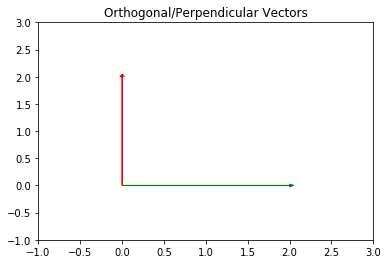

In [76]:
#a synonym for orthogonal is perpendicular
import matplotlib.pyplot as plt

vector_1 = [0,2]
vector_2 = [2,0]

plt.arrow(0,0,vector_1[0], vector_1[1], head_width=.05, head_length=.05, color='r')
plt.arrow(0,0,vector_2[0], vector_2[1], head_width=.05, head_length=.05, color='g')
plt.xlim(-1,3)
plt.ylim(-1,3)
plt.title("Orthogonal/Perpendicular Vectors")
plt.show()

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [80]:
#determine orthogonality using the dot product command
a = [-5,3,7]
b = [6,-8,2]
np.dot(a,b)
#vectors a and b are not orthogonal. We know this because their dot product does
#not equal 0.

-40

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [0]:
#create vector c
c = [2,-15,6,20]

In [83]:
#What is  ||c||^2 ?
(np.linalg.norm(c))**2

665.0

In [84]:
#dot product of c and c
np.dot(c,c)

665

In [91]:
#product of c^T and c
#The dot product of a vector and itself can be rewritten as that vector times the transpose of itself. 
c_series = pd.Series(c)
sum(c_series.T*c_series)


665

In [0]:
#They all have the same value

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
d = 7\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12\begin{bmatrix} 0 \\ 1 \end{bmatrix} = 7\hat{i} + 12\hat{j}
\end{align}

\begin{align}
d = 2\begin{bmatrix} 1 \\ 0 \\0 \end{bmatrix} + 11\begin{bmatrix} 0 \\ 1 \\0\end{bmatrix} -8\begin{bmatrix} 0\\0\\1\end{bmatrix} = 2\hat{i} + 11\hat{j} -8\hat{k}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [0]:
#You can turn any non-zero vector into a unit vector by dividing it by its norm (length/magnitude).
#create the vector

f = [4,12,11,9,2]

In [96]:
#find the norm of f
f_norm = np.linalg.norm(f)
print('{:.4f}'.format(f_norm))

19.1311


In [103]:
#divide vector f by its norm
f_unit = f/f_norm
f_unit

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

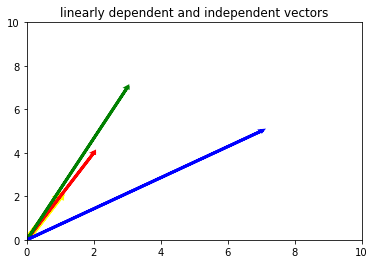

In [108]:
#dependent vectors
a = [1,2]
b = [2,4]

#independent vectors
c = [3,7]
d = [7,5]

plt.xlim(0,10)
plt.ylim(0,10)

#dependent vectors will be on the same line
plt.arrow(0,0,a[0],a[1], linewidth=6, head_width=.05, head_length=0.05, color ='yellow')
plt.arrow(0,0,b[0],b[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')
#independent vectors will be on different lines
plt.arrow(0,0,c[0],c[1], linewidth=3, head_width=.05, head_length=0.05, color ='green')
plt.arrow(0,0,d[0],d[1], linewidth=3, head_width=.05, head_length=0.05, color ='blue')

plt.title("linearly dependent and independent vectors")
plt.show()




# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

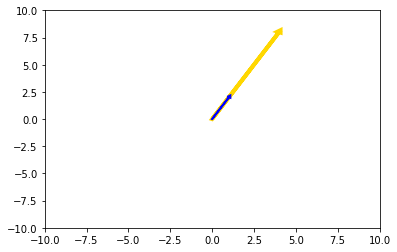

In [113]:
#The span of the followign vectors is R: These vectors will only span one dimension
#because they are colinear

g = [1,2]
h = [4,8]

plt.xlim(-10,10)
plt.ylim(-10,10)

plt.arrow(0,0,h[0],h[1],head_width=.2,head_length=.2,linewidth=4,color='gold')
plt.arrow(0,0,g[0],g[1],head_width=.2,head_length=.2,linewidth=2,color='blue')

plt.show()

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [0]:
#the span of {l,m,n} is all 3 Dimensional space, R^3

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



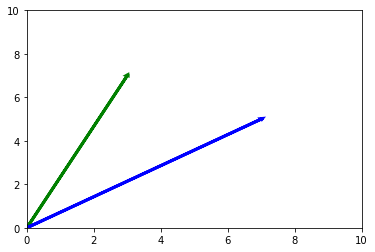

In [116]:

plt.xlim(0,10)
plt.ylim(0,10)

plt.arrow(0,0,c[0],c[1], linewidth=3, head_width=.05, head_length=0.05, color ='green')
plt.arrow(0,0,d[0],d[1], linewidth=3, head_width=.05, head_length=0.05, color ='blue')
plt.show()

## 6.2 What does it mean to form a basis?

To form a basis means to form a set of vectors that are linearly independent and span the vector space as the set of vectors above do. 

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [117]:
#find the rank of the matrix
P = [[1,2,3],[-1,0,7],[4,8,2]]
np.linalg.matrix_rank(P)

3

## 7.2 What does the rank of a matrix tell us?

The rank of a matrix tells us the dimension of the vector space spanned by its columns.

# Linear Projections (stretch goal)

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

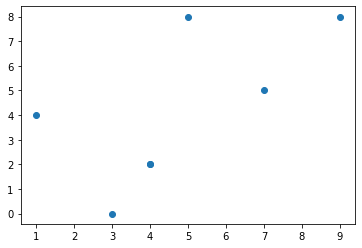

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()